In [50]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
cmap = plt.get_cmap('winter') #cool , cooper, berlin, managua, brg, gist_rainbow, jet, turbo


labelsize_for_all=16


nameFolder = "Model5_SinPolvo0.05"



In [138]:
import matplotlib as mpl

labelsize_for_all = 16

plt.rcParams.update({
    'font.family': 'serif',         # Tipo de letra
    'font.size': 14,                # Tamaño base
    'axes.titlesize': 16,           # Tamaño del título del gráfico
    'axes.labelsize': labelsize_for_all,           # Tamaño de los ejes
    'xtick.labelsize': labelsize_for_all,          # Tamaño de las etiquetas del eje x
    'ytick.labelsize': labelsize_for_all,          # Tamaño de las etiquetas del eje y
    'legend.fontsize': labelsize_for_all,          # Tamaño de la leyenda
    #'figure.figsize': (8, 5),       # Tamaño por defecto de las figuras
    'lines.linewidth': 2,           # Grosor de las líneas
    'grid.alpha': 0.3               # Transparencia de la grilla
})


In [139]:
Rt = 12 
pc = 4.328e-05
rhoc =  2.87e-4

In [140]:
def processFile2(nameFolder,nameFile):
    
    nameFile="TOVstar2_"+nameFolder+"/"+nameFile
    out=[]
    t_i=[]
    
    with open(nameFile, 'rb') as file:
        lines = file.readlines()

        t=0
        x_i=[]
        y_i=[]
        t_i=[]
        for l in lines:
            if len(str(l.split()))==2:
                continue
                print("here ",l)
            elif (str(l)[2]=="#"):
                if t!=0:
                    #print(x_i[0],y_i[0])
                    out.append([np.array(x_i),np.array(y_i)])
                    x_i=[]
                    y_i=[]
                t_i.append(float(l.split()[2]))
                #print (float(l.split()[2]))
                t+=1
            else:
                x_i.append(float(l.split()[0]))
                y_i.append(float(l.split()[1]))

        if len(out)==0:
            out.append([np.array(x_i),np.array(y_i)])
    #print("tiempo=",t_i,len(t_i))
    return out,t_i

In [141]:
def plot_at_time(y, t, label_time, ymin, ymax, name, title,labelloc="upper left",c="black",exp=1,central=1):
    plt.figure()
    
    #print(central)
    
    y1 = (np.array(y[1])/central )*exp
    
    plt.plot(y[0], y1, '-', color=c,
             label=fr"$t = {label_time:.0f}$")
    
    plt.vlines(Rt, ymin, ymax, colors="gray", linestyles='dashed')
    
    plt.xlabel(r"$r\ [km]$", fontsize=labelsize_for_all)
    plt.ylabel(title, fontsize=labelsize_for_all)
    plt.legend(fancybox=True,loc=labelloc)
    plt.grid()
    plt.xlim(0,13)
    plt.ylim(ymin,ymax)
    
    #plt.savefig(f"{name}_{label_time:.0f}.pdf")
    plt.savefig(f"{name}_{label_time:.0f}.pdf", bbox_inches="tight")

    plt.show()

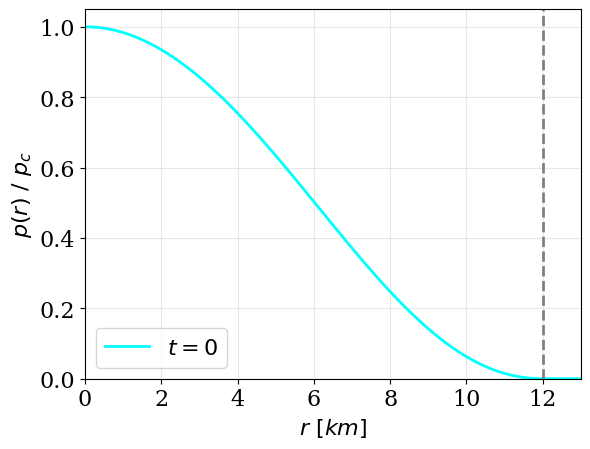

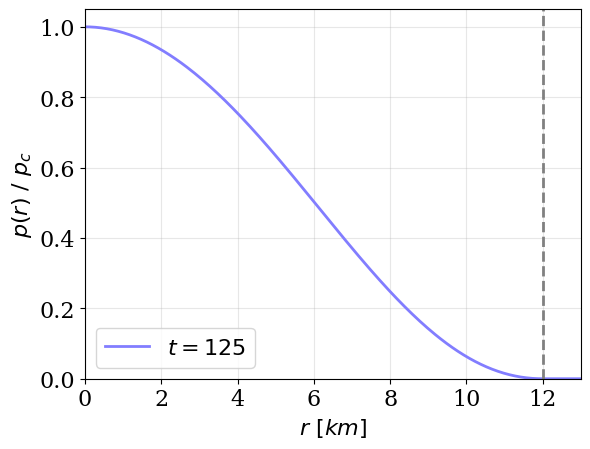

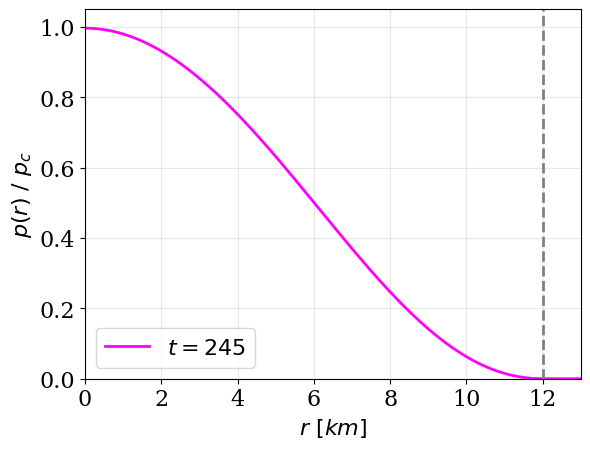

In [142]:
nameFile="fluid_p0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$p(r)\ /\ p_c$"
ymin=0.
ymax=1.05


## t=0
i0 = 0

plot_at_time(a_Ollin[i0], T[i0], T[i0],
             ymin,ymax,name,title,c=colors[i0],
             central=pc,labelloc="lower left")
#y, t, label_time, ymin, ymax, name, title


## t=mitad
imitad = len(T) // 2

plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],
             ymin,ymax,name,title,c=colors[imitad],
             central=pc,labelloc="lower left")

## t=final
ifinal = len(T) - 2

plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],
             ymin,ymax,name,title,c=colors[ifinal],
             central=pc,labelloc="lower left")





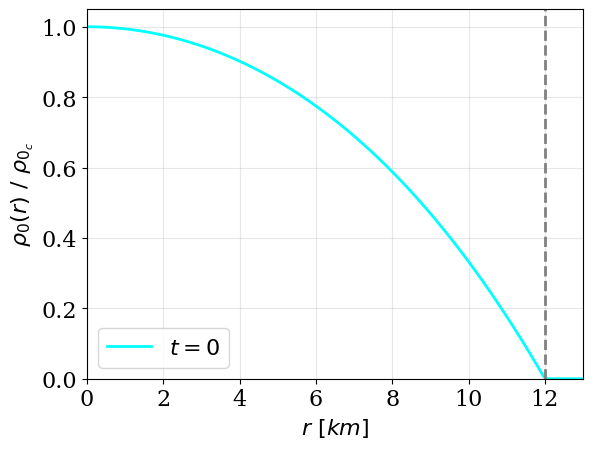

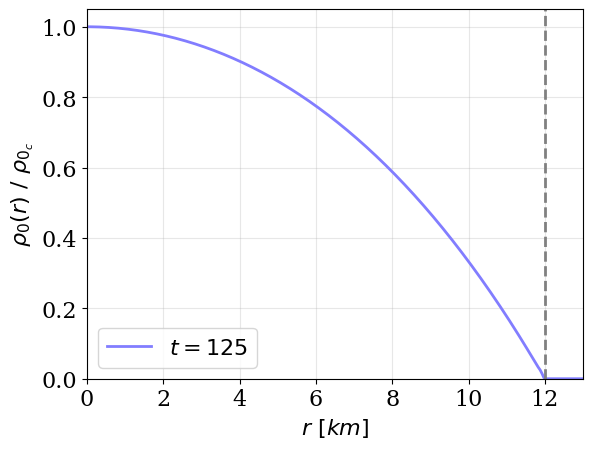

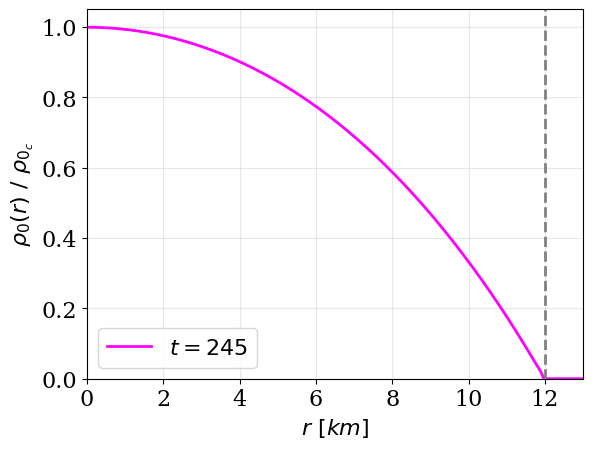

In [143]:
nameFile="fluid_rho0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$\rho_0(r)\ /\ \rho_{0_c}$"
ymin=0.
ymax=1.05


## t=0
i0 = 0

plot_at_time(a_Ollin[i0], T[i0], T[i0],
             ymin,ymax,name,title,c=colors[i0],
             central=rhoc,labelloc="lower left")
#y, t, label_time, ymin, ymax, name, title


## t=mitad
imitad = len(T) // 2

plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],
             ymin,ymax,name,title,c=colors[imitad],
             central=rhoc,labelloc="lower left")

## t=final
ifinal = len(T) - 2

plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],
             ymin,ymax,name,title,c=colors[ifinal],
             central=rhoc,labelloc="lower left")





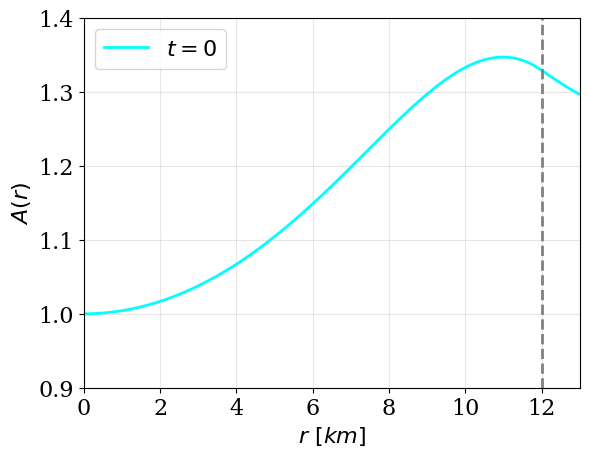

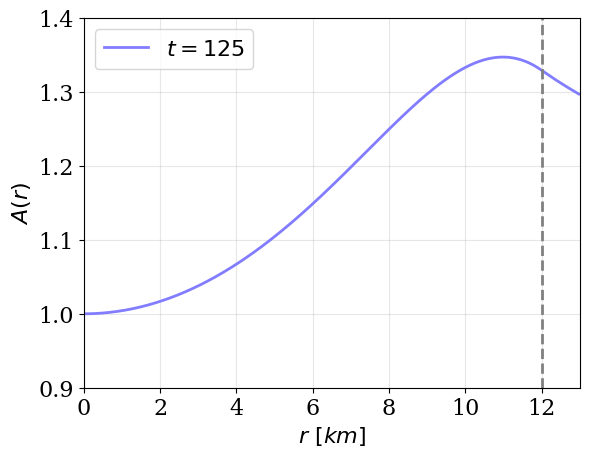

51 50


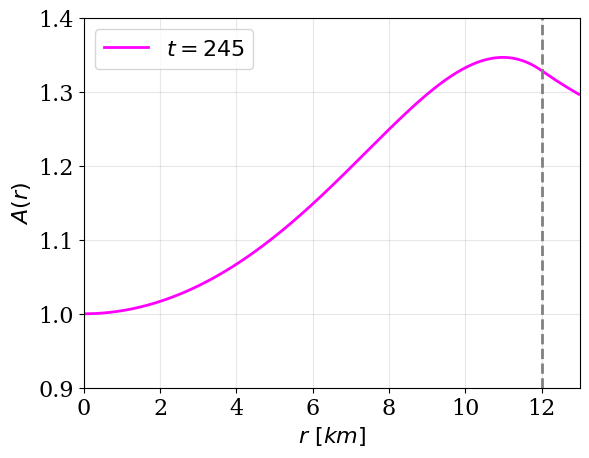

In [144]:
nameFile="A0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$A(r)$"
ymin=0.9
ymax=1.4


## t=0
i0 = 0
plot_at_time(a_Ollin[i0], T[i0], T[i0],ymin,1.4,name,title,c=colors[i0])
#y, t, label_time, ymin, ymax, name, title

## t=0
imitad = len(T) // 2
plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],ymin,ymax,name,title,c=colors[imitad])

## t=final
print(len(T),len(a_Ollin))
ifinal = len(T) - 2
plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],ymin,ymax,name,title,c=colors[ifinal])





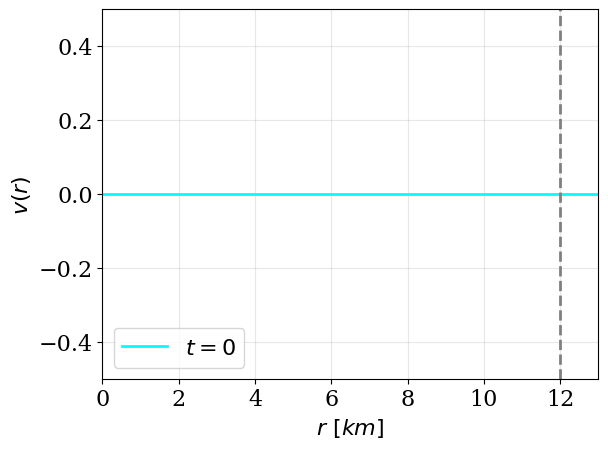

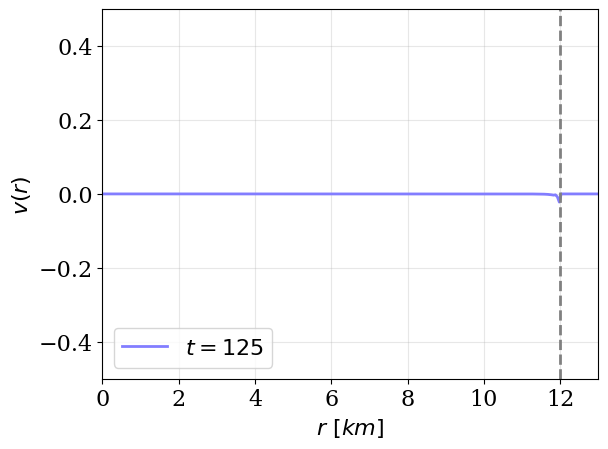

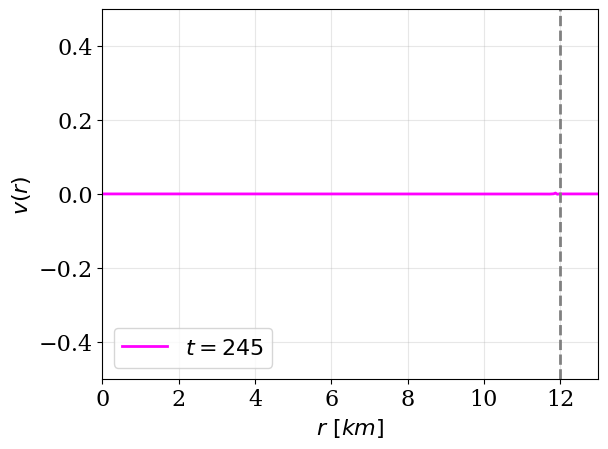

In [146]:
nameFile="fluid_v0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$v(r)$"
ymin=-0.5
ymax=0.5


## t=0
i0 = 0

plot_at_time(a_Ollin[i0], T[i0], T[i0],
             ymin,ymax,name,title,c=colors[i0],
             labelloc="lower left")
#y, t, label_time, ymin, ymax, name, title


## t=mitad
imitad = len(T) // 2

plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],
             ymin,ymax,name,title,c=colors[imitad],
             labelloc="lower left")

## t=final
ifinal = len(T) - 2

plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],
             ymin,ymax,name,title,c=colors[ifinal],
             labelloc="lower left")





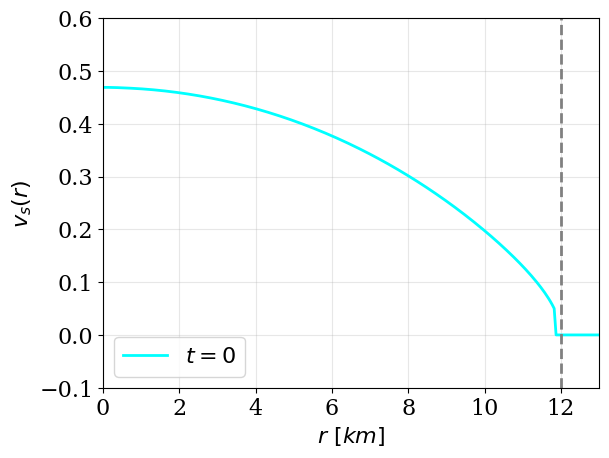

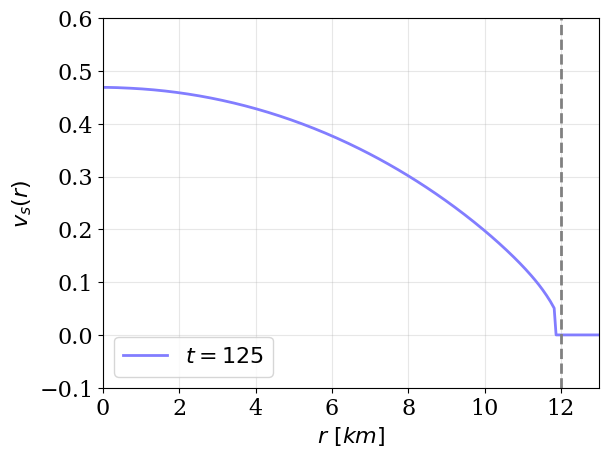

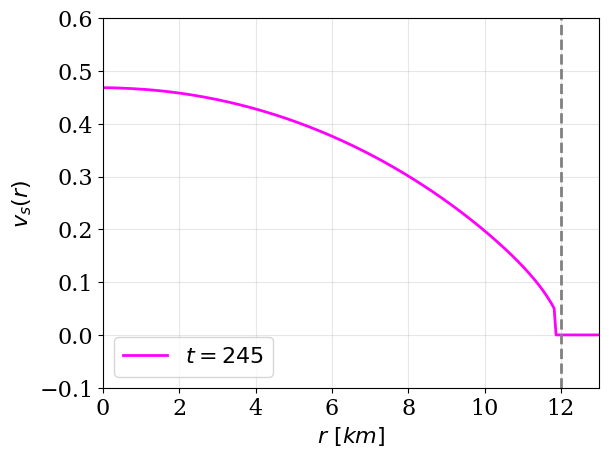

In [147]:
nameFile="fluid_vs0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$v_{s}(r)$"
ymin=-0.1
ymax=0.6


## t=0
i0 = 0

plot_at_time(a_Ollin[i0], T[i0], T[i0],
             ymin,ymax,name,title,c=colors[i0],
             labelloc="lower left")
#y, t, label_time, ymin, ymax, name, title


## t=mitad
imitad = len(T) // 2

plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],
             ymin,ymax,name,title,c=colors[imitad],
             labelloc="lower left")

## t=final
ifinal = len(T) - 2

plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],
             ymin,ymax,name,title,c=colors[ifinal],
             labelloc="lower left")



